In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df = pd.read_csv('Cars.csv').iloc[:,1:]
sp = df.pop('selling_price')
df.insert(0,'Selling_Price', sp)
km = df.pop('km_driven')
df.insert(1,'km_driven', km)
df['Selling_Price'] = np.log10(df['Selling_Price']) #Log transform for a better fit
df['km_driven'] = np.log10(df['km_driven']) 
df

,Selling_Price,km_driven,owner,Age,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Manual
0,4.778151,4.845098,0,16,0,1,0,1,1
1,5.130334,4.698970,0,16,0,1,0,1,1
2,5.778151,5.000000,0,11,1,0,0,1,1
3,5.397940,4.662758,0,6,0,1,0,1,1
4,5.653213,5.149219,1,9,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
4335,5.612783,4.903090,1,9,1,0,0,1,1
4336,5.612783,4.903090,1,9,1,0,0,1,1
4337,5.041393,4.919078,1,14,0,1,0,1,1
4338,5.937016,4.954243,0,7,1,0,0,1,1


<AxesSubplot:>

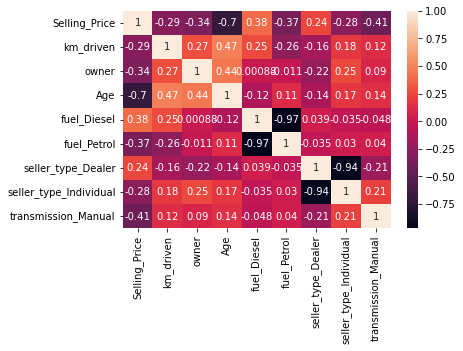

In [241]:
sns.heatmap(df.corr(), annot = True)

In [204]:
met = pd.DataFrame(columns = ['MSE test','R2 test','MSE train','R2 train'])
met

,MSE test,R2 test,MSE train,R2 train


In [206]:
met

,MSE test,R2 test,MSE train,R2 train
0,1,NaN,NaN,NaN


In [219]:
met = pd.DataFrame(columns = ['MSE test','R2 test','MSE train','R2 train'])
for i in range(1,16):
    df = pd.read_csv('Cars.csv').iloc[:,1:]
    sp = df.pop('selling_price')
    df.insert(0,'Selling_Price', sp)
    km = df.pop('km_driven')
    df.insert(1,'km_driven', km)
    df['Selling_Price'] = np.log10(df['Selling_Price']) #Log transform for a better fit
    df['km_driven'] = np.log10(df['km_driven']) 
    X = np.array(df['km_driven']).reshape(-1, 1)
    p = PolynomialFeatures(degree = i,include_bias = False)
    t = p.fit_transform(X)
    km = pd.DataFrame(t, columns = ['km_driven' + str(j) for j in range(1,i+1)])
    df = pd.concat([df,km],axis = 1)
    df = df.drop(columns='km_driven')
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,2:],df.iloc[:,0], test_size = .2, random_state = 0)
    linreg = LinearRegression()
    linreg.fit(X_train,y_train)
    y_pred = linreg.predict(X_test)
    met.loc[i,'MSE test'] = mean_squared_error(y_test,y_pred)
    met.loc[i,'R2 test'] = r2_score(y_test,y_pred)
    met.loc[i,'MSE train'] = mean_squared_error(y_train,linreg.predict(X_train))
    met.loc[i,'R2 train'] = r2_score(y_train,linreg.predict(X_train))

In [217]:
met = pd.DataFrame(columns = ['MSE test','R2 test','MSE train','R2 train'])
for i in range(1,16):
    df = pd.read_csv('Cars.csv').iloc[:,1:]
    sp = df.pop('selling_price')
    df.insert(0,'Selling_Price', sp)
    km = df.pop('km_driven')
    df.insert(1,'km_driven', km)
    df['Selling_Price'] = np.log10(df['Selling_Price']) #Log transform for a better fit
    df['km_driven'] = np.log10(df['km_driven']) 
    X = np.array(df['Age']).reshape(-1, 1)
    p = PolynomialFeatures(degree = i,include_bias = False)
    t = p.fit_transform(X)
    km = pd.DataFrame(t, columns = ['Age' + str(j) for j in range(1,i+1)])
    df = pd.concat([df,km],axis = 1)
    df = df.drop(columns='Age')
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,2:],df.iloc[:,0], test_size = .2, random_state = 0)
    linreg = LinearRegression()
    linreg.fit(X_train,y_train)
    y_pred = linreg.predict(X_test)
    met.loc[i,'MSE test'] = mean_squared_error(y_test,y_pred)
    met.loc[i,'R2 test'] = r2_score(y_test,y_pred)
    met.loc[i,'MSE train'] = mean_squared_error(y_train,linreg.predict(X_train))
    met.loc[i,'R2 train'] = r2_score(y_train,linreg.predict(X_train))

In [218]:
met # For Age degree 2 seems best

,MSE test,R2 test,MSE train,R2 train
1,0.043174,0.686521,0.04153,0.684309
2,0.041857,0.696085,0.04112,0.687428
3,0.041518,0.698541,0.040958,0.688657
4,0.041619,0.697812,0.040943,0.688775
5,0.041547,0.698331,0.040936,0.688828
6,0.041557,0.698258,0.040936,0.688828
7,0.041522,0.698515,0.040932,0.688859
8,0.041551,0.698305,0.040931,0.688865
9,0.041518,0.698546,0.040927,0.6889
10,0.041656,0.69754,0.040916,0.688983


In [220]:
met # for km degree 2 seems best

,MSE test,R2 test,MSE train,R2 train
1,0.042966,0.688027,0.041534,0.684283
2,0.042882,0.688639,0.041488,0.684634
3,0.042884,0.688626,0.041459,0.68485
4,0.042853,0.688848,0.041408,0.685237
5,0.04279,0.689305,0.041399,0.685311
6,0.042781,0.689376,0.041391,0.68537
7,0.04275,0.689597,0.041389,0.685381
8,0.04285,0.688868,0.041372,0.685512
9,0.042859,0.688807,0.041368,0.685541
10,0.042899,0.688516,0.041366,0.68556


<AxesSubplot:xlabel='km_driven', ylabel='Selling_Price'>

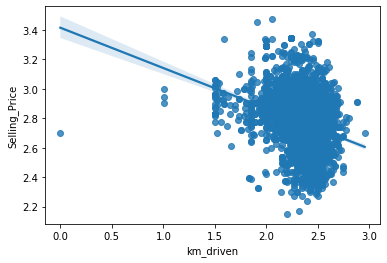

In [151]:
sns.regplot(x = np.log(df['km_driven'])/np.log(100),y = np.log(df['Selling_Price'])/np.log(100))

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,2:],df.iloc[:,0], test_size = .2, random_state = 0)

In [86]:
X_train

,owner,Age,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Manual
159,0,8,1,0,0,1,1
4334,0,11,1,0,0,1,1
1657,0,17,0,1,0,1,1
2188,0,8,0,1,0,0,1
581,0,7,0,1,1,0,1
...,...,...,...,...,...,...,...
1033,0,10,1,0,1,0,0
3264,0,11,1,0,0,1,1
1653,0,7,0,1,0,1,1
2607,0,8,1,0,0,1,1


In [88]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
linreg.coef_

array([-0.02548195, -0.05056274,  0.25538213,  0.04105674, -0.12529047,
       -0.20270947, -0.3399354 ])

In [6]:
mean_squared_error(y_test,y_pred) 

0.04285275253831128

In [7]:
r2_score(y_test,y_pred) 

0.6888511024093908

In [8]:
mean_squared_error(y_train,linreg.predict(X_train))

0.0414267340083811

In [9]:
r2_score(y_train,linreg.predict(X_train))

0.6850973380154

<AxesSubplot:xlabel='Age', ylabel='Selling_Price'>

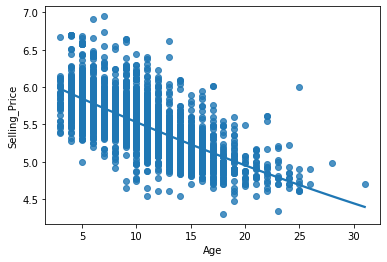

In [224]:
sns.regplot(x = X_train['Age'], y = y_train, order = 2, ci = False)

<AxesSubplot:xlabel='km_driven1', ylabel='Selling_Price'>

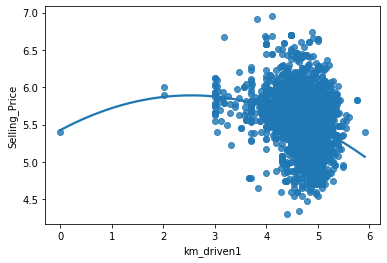

In [191]:
sns.regplot(x = X_train['km_driven1'], y = y_train, order = 2, ci = False)

In [230]:
X = np.array(df['Age']).reshape(-1, 1)
p2 = PolynomialFeatures(degree = 2,include_bias = False)
t = p2.fit_transform(X)
t

array([[ 16., 256.],
       [ 16., 256.],
       [ 11., 121.],
       ...,
       [ 14., 196.],
       [  7.,  49.],
       [  7.,  49.]])

In [234]:
df = df.drop(columns = ['km_driven','Age'])

In [231]:
km = pd.DataFrame(t, columns = ['Age' + str(i) for i in range(1,3)])

In [232]:
df = pd.concat([df,km],axis = 1)

In [233]:
df

,Selling_Price,km_driven,owner,Age,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Manual,km_driven1,km_driven2,Age1,Age2
0,4.778151,4.845098,0,16,0,1,0,1,1,4.845098,23.474975,16.0,256.0
1,5.130334,4.698970,0,16,0,1,0,1,1,4.698970,22.080319,16.0,256.0
2,5.778151,5.000000,0,11,1,0,0,1,1,5.000000,25.000000,11.0,121.0
3,5.397940,4.662758,0,6,0,1,0,1,1,4.662758,21.741311,6.0,36.0
4,5.653213,5.149219,1,9,1,0,0,1,1,5.149219,26.514457,9.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,5.612783,4.903090,1,9,1,0,0,1,1,4.903090,24.040291,9.0,81.0
4336,5.612783,4.903090,1,9,1,0,0,1,1,4.903090,24.040291,9.0,81.0
4337,5.041393,4.919078,1,14,0,1,0,1,1,4.919078,24.197329,14.0,196.0
4338,5.937016,4.954243,0,7,1,0,0,1,1,4.954243,24.544519,7.0,49.0


In [235]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0], test_size = .2, random_state = 0)

In [236]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
linreg.coef_

array([-0.01957435,  0.25891924,  0.033088  , -0.12369403, -0.20287015,
       -0.33373442,  0.06622379, -0.0092014 , -0.06808305,  0.00077584])

In [237]:
print(mean_squared_error(y_test,y_pred)) #Degree 2 for both age and km_driven this looks to be the best choice
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_train,linreg.predict(X_train)))
print(r2_score(y_train,linreg.predict(X_train)))

0.04180852660289527
0.6964331065840291
0.04109584211708062
0.6876125915079527


In [186]:
X_test.shape

(868, 13)

In [90]:
-mean_squared_error(y_test,y_pred)/(r2_score(y_test,y_pred)-1)

0.1377242627891112

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0], test_size = .2, random_state = 0)

In [127]:
rf = RandomForestRegressor(n_jobs = -1)

In [128]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [129]:
mean_squared_error(y_test,y_pred)

0.03847394560836096

In [130]:
r2_score(y_test,y_pred)

0.7206451148896416

In [131]:
[None]+[1,2,3]

[None, 1, 2, 3]

In [247]:
pt = {'n_estimators':range(96,101),'max_depth':[None]+list(range(1,11)),'max_features':range(2,5),'n_jobs':[-1]}

In [248]:
grid = GridSearchCV(estimator = rf, param_grid = pt, n_jobs = -1, scoring = 'r2')
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': range(2, 5),
                         'n_estimators': range(96, 101), 'n_jobs': [-1]},
             scoring='r2')

In [249]:
print("Optimal Hyper-parameters : ", grid.best_params_)
print("Optimal Score : ", grid.best_score_)

Optimal Hyper-parameters :  {'max_depth': 10, 'max_features': 2, 'n_estimators': 98, 'n_jobs': -1}
Optimal Score :  0.7167798617692783


In [6]:
rf = RandomForestRegressor(max_depth = 10, max_features = 2, n_estimators = 100, n_jobs = -1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [7]:
mean_squared_error(y_test,y_pred)

0.03605858014434426

In [8]:
r2_score(y_test,y_pred)

0.7381828051636872